# Customer Segmentation using Discriminant Analysis and Cluster Analysis

Shreya Singireddy

### Importing the packages and the running the csv file

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns

In [2]:
credit_card = pd.read_csv(r"C:\Users\31345\OneDrive - Indian School of Business\FPM\Multivariate Statistics\Project\CC GENERAl.csv")
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Understanding the Variables considered

### EDA 

In [3]:
credit_card.info() #Getting Full information about the data structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [48]:
credit_card.isnull().sum() #Checking for missing values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [46]:
df=credit_card.describe() #Summary of the values 
print(df)

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [47]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
df_styled = df.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"mytable.png")

In [5]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [6]:
non_categorical_data = credit_card.drop(['CUST_ID'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


### Understanding the plot distributions 

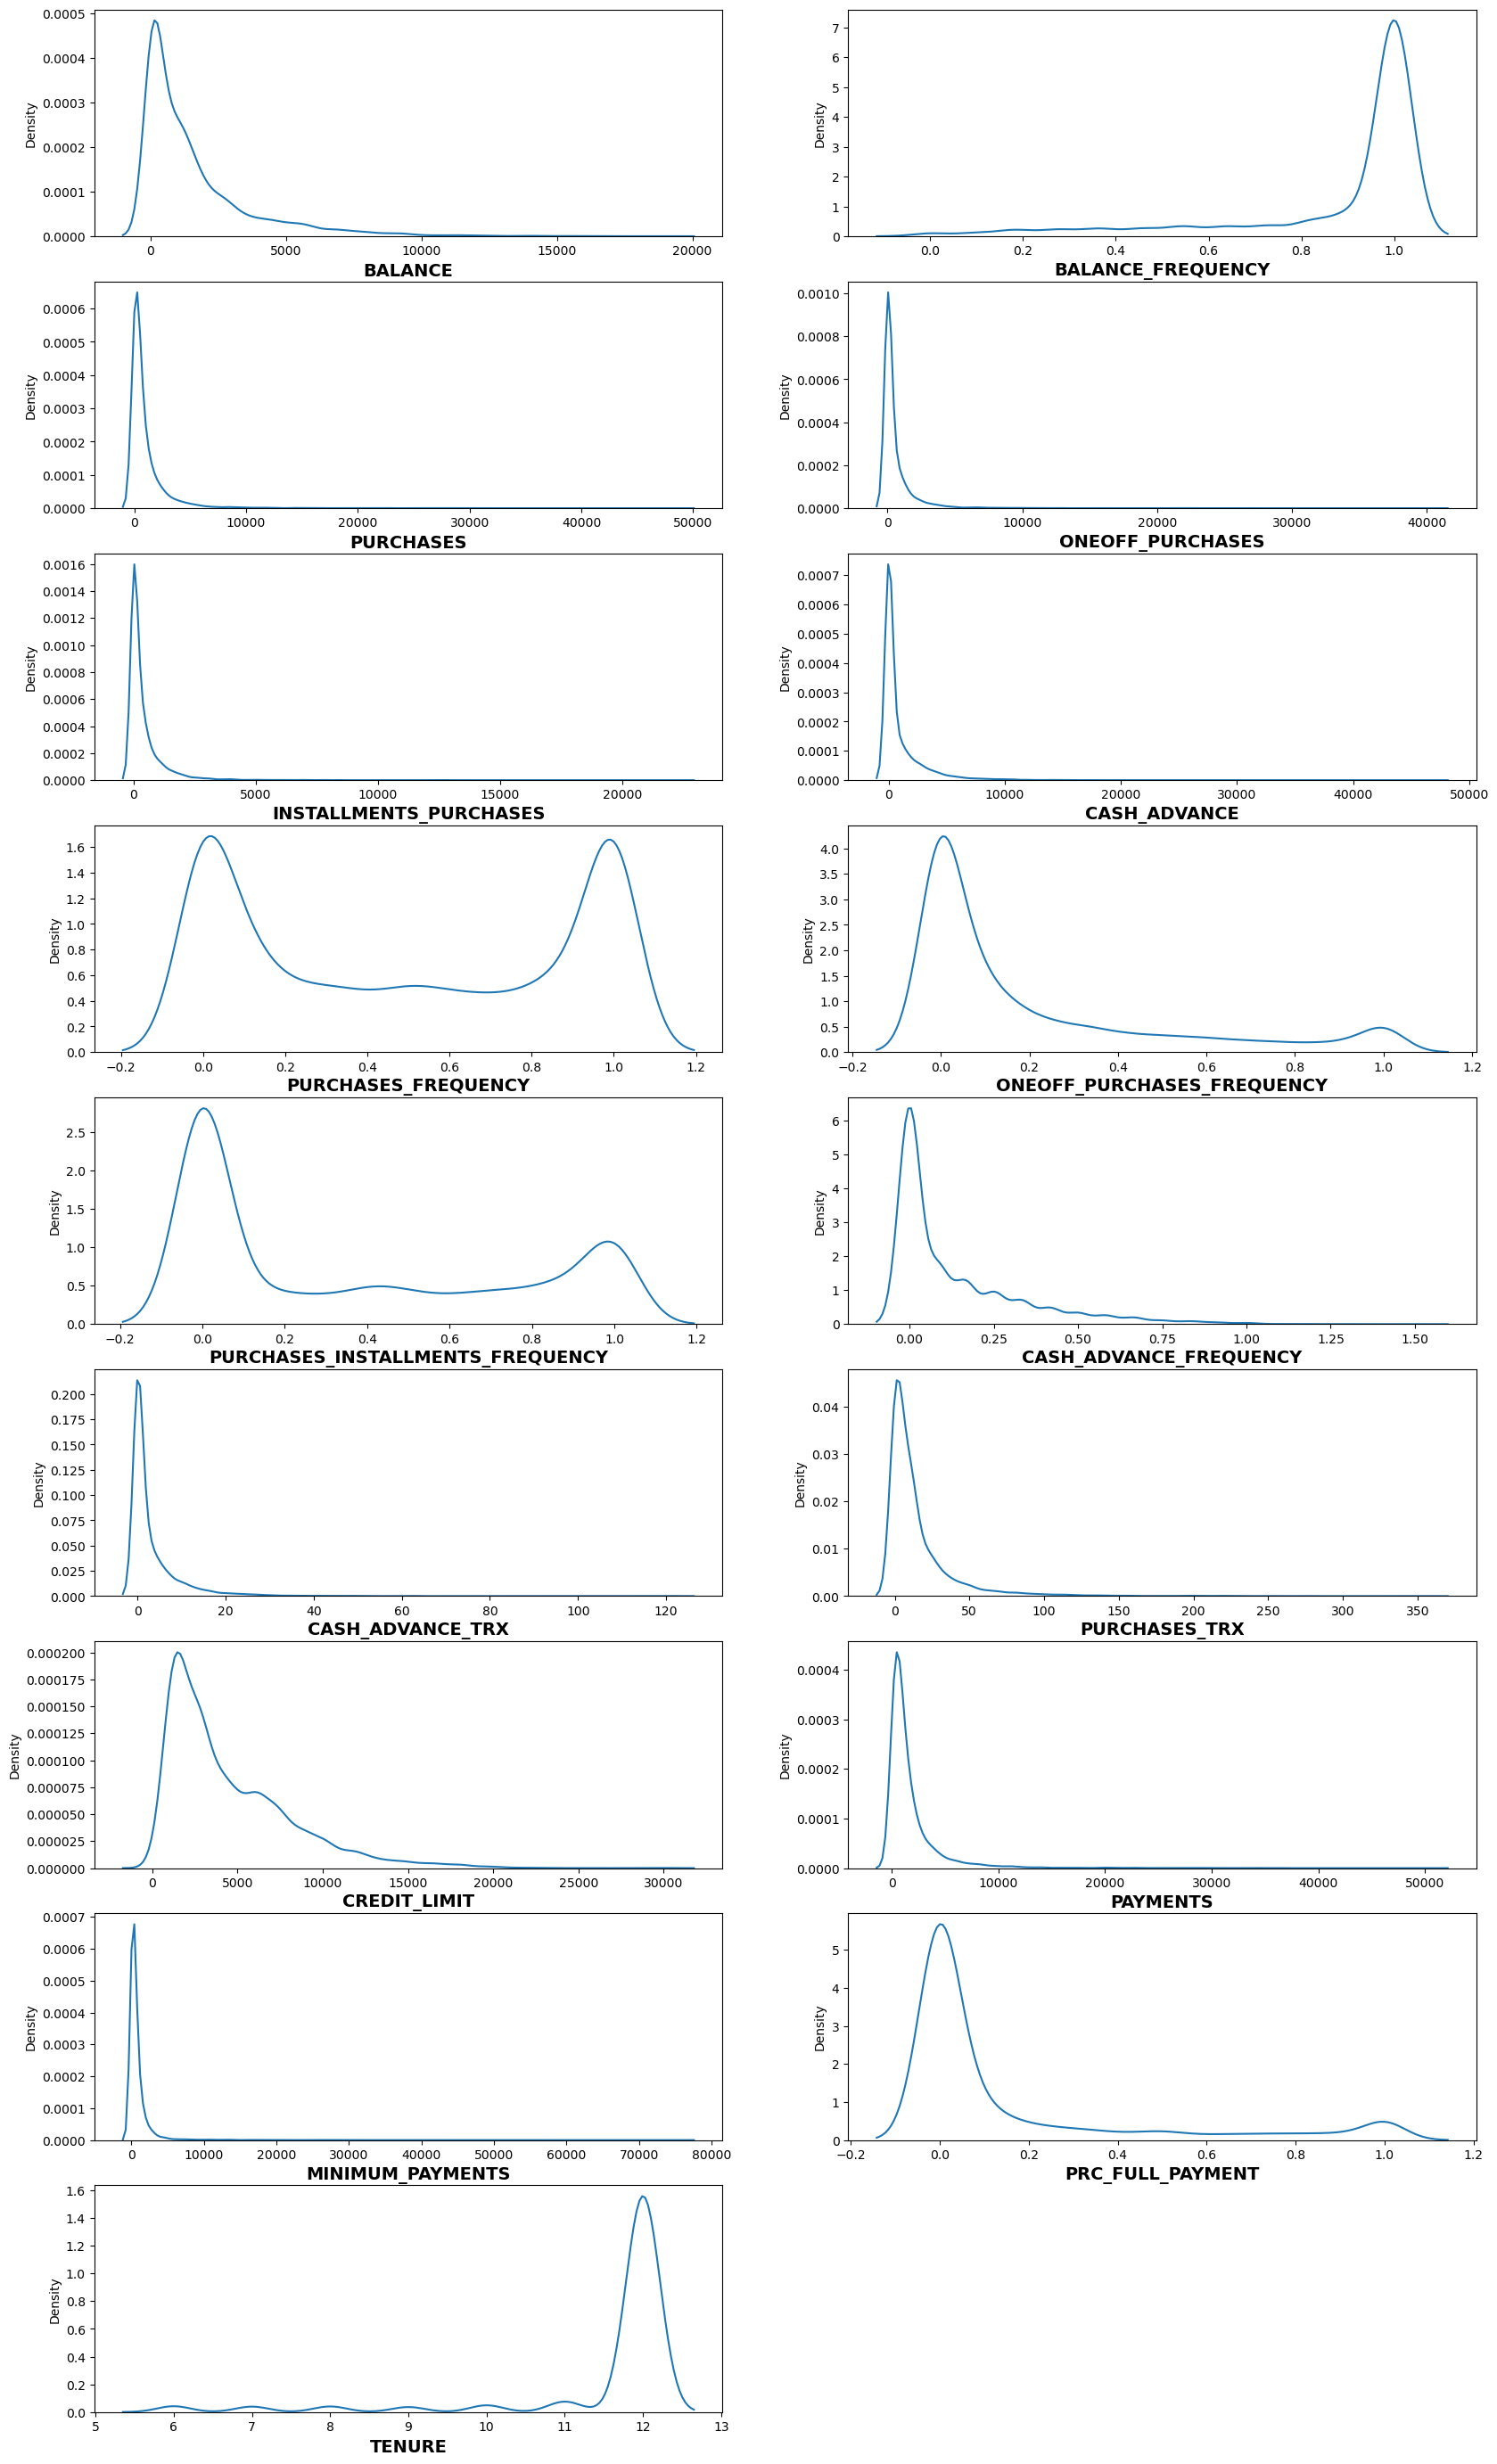

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

xy_label=dict(fontweight='bold', fontsize=14)

plt.figure(figsize=(20,35))
for i, col in enumerate(non_categorical_data.columns):
    if credit_card[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(credit_card[col], ax=ax)
        plt.xlabel(col, **xy_label)
        
plt.show()

### Understanding the Correlation

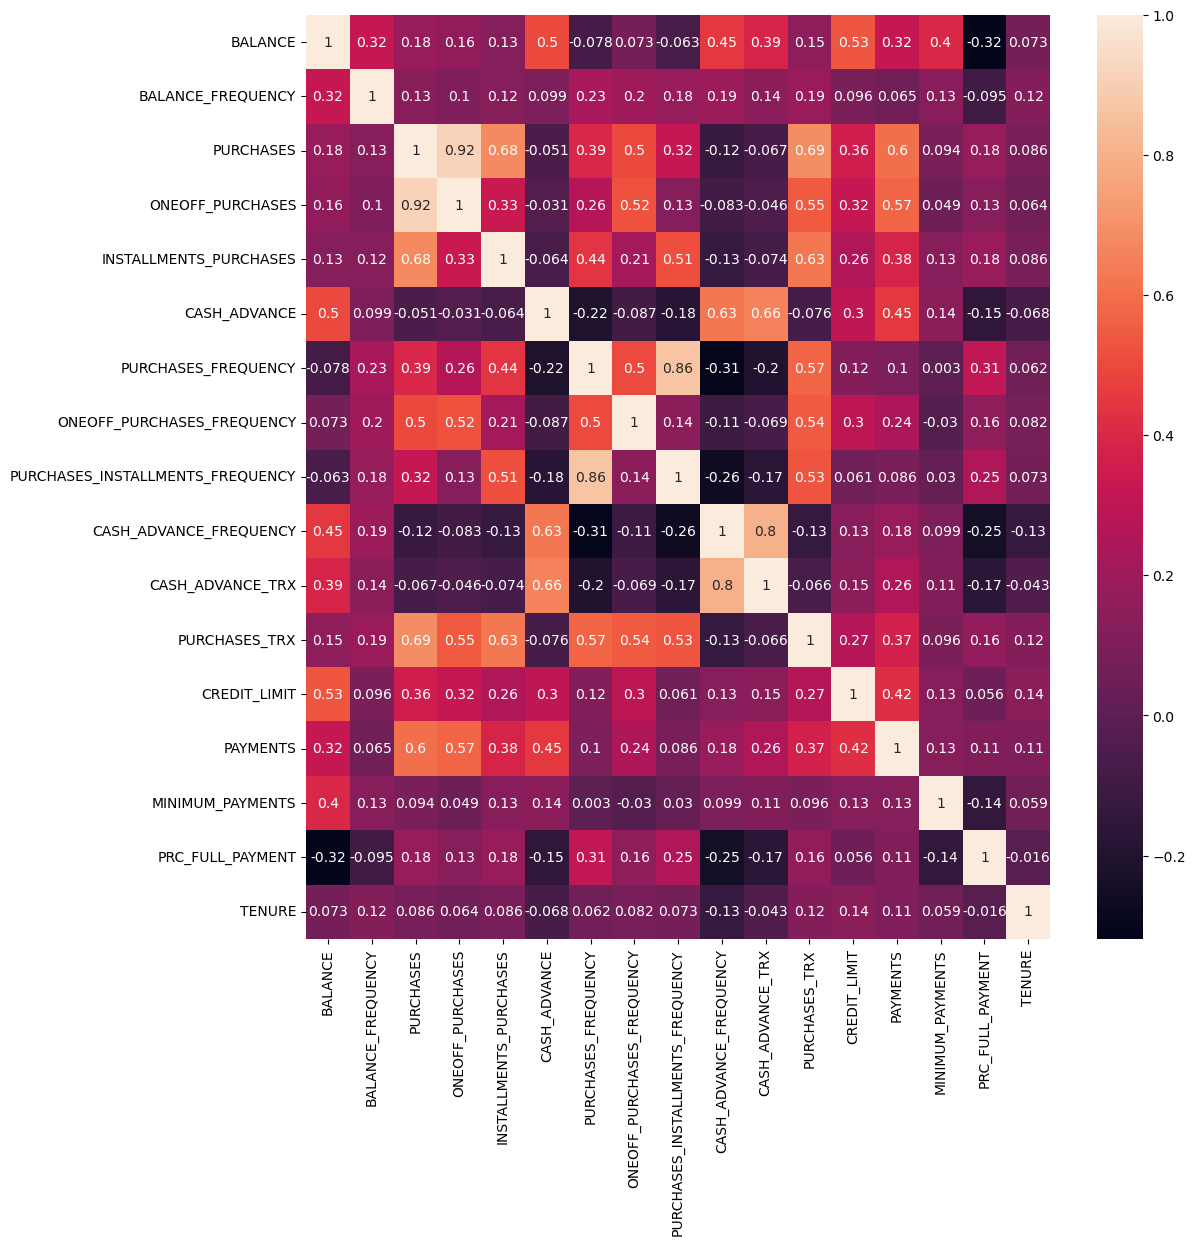

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(credit_card.corr(), annot=True)
plt.show()

### Variable wise Comparison : Credit Limit v/s Balance based on Tenure

C:\Users\31345\AppData\Local\Temp\ipykernel_20864\3310452844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clb['TENURE'] = clb['TENURE'].astype(str)


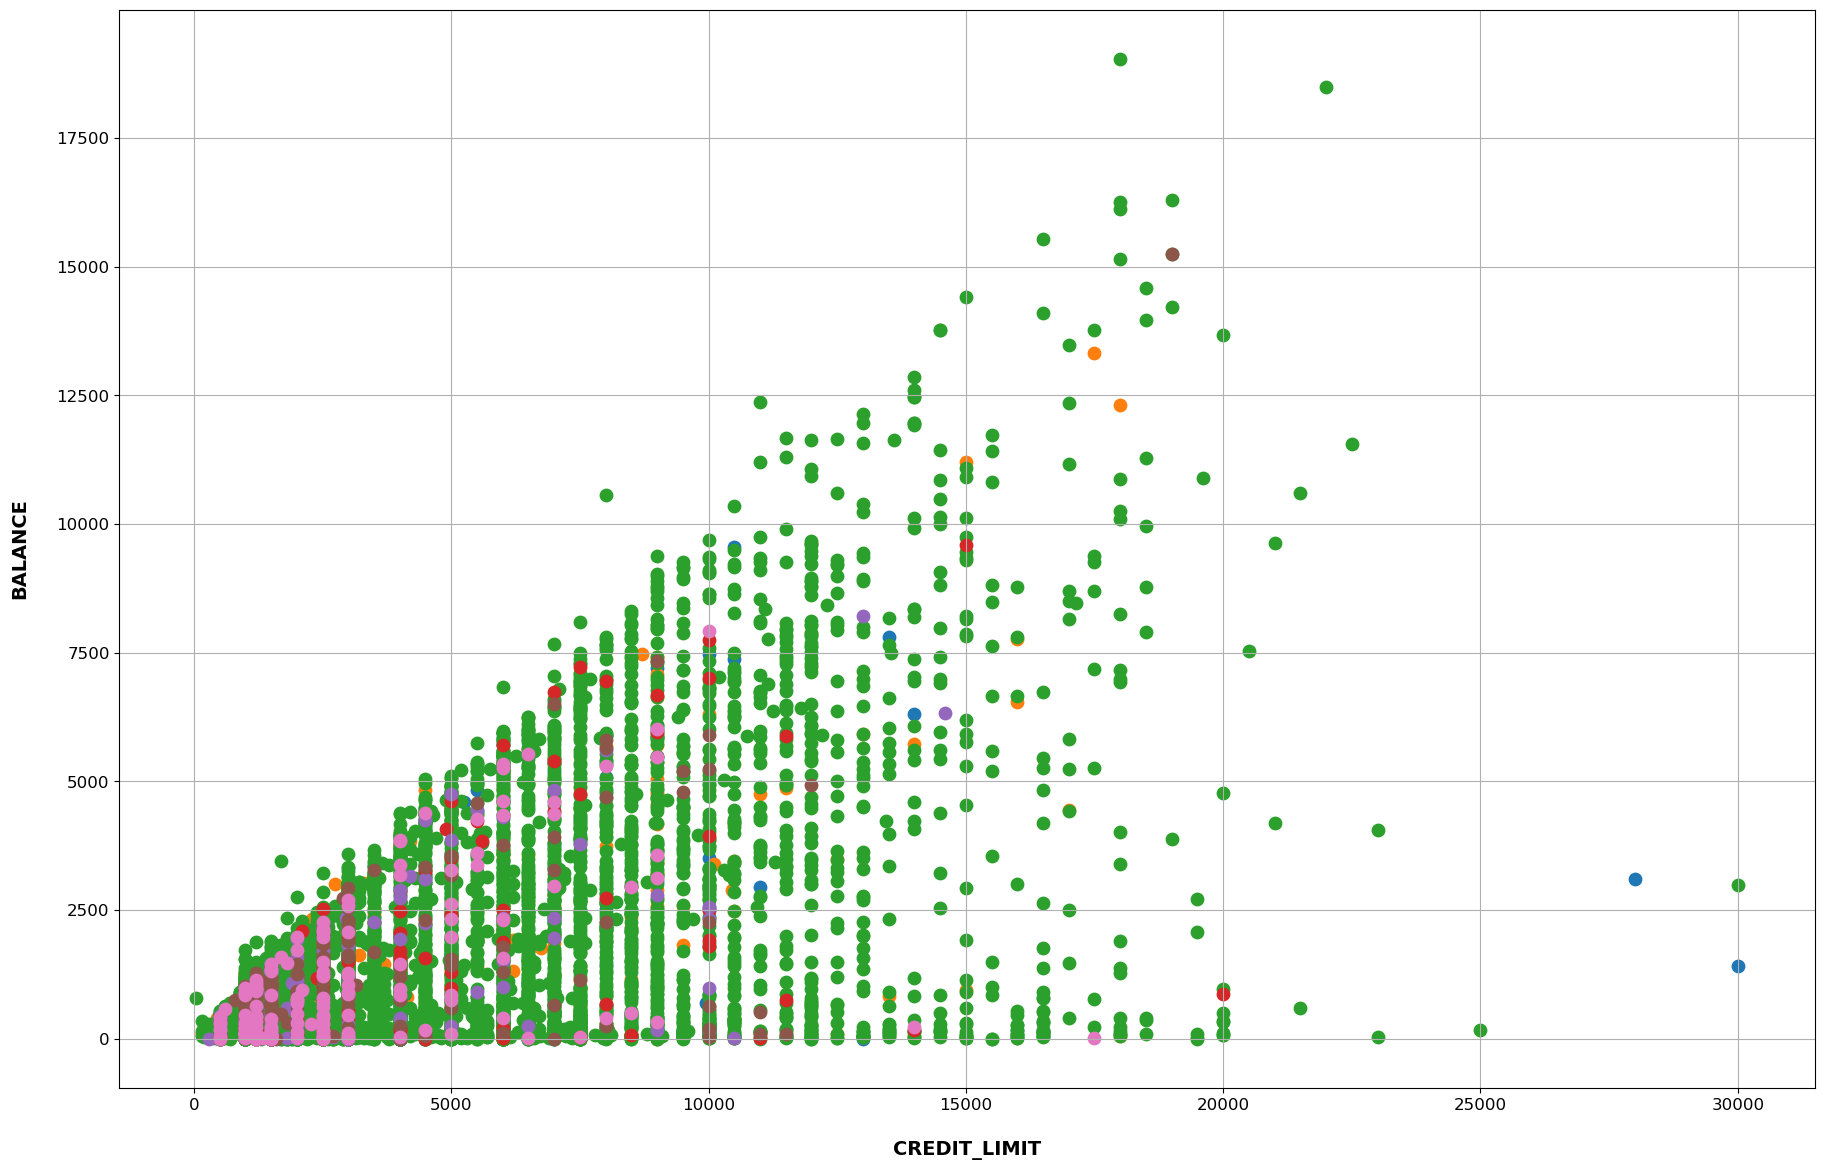

In [9]:
clb = credit_card[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
clb['TENURE'] = clb['TENURE'].astype(str)
tenure = sorted(clb['TENURE'].unique())

xy_label=dict(fontweight='bold', fontsize=14)

fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

for x in range(len(tenure)):
    clb_x = clb[clb['TENURE']==tenure[x]]
    ax.scatter(clb_x['CREDIT_LIMIT'], clb_x['BALANCE'], s=80)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('BALANCE\n', **xy_label)
    ax.grid(axis='y', which='major')
    ax.grid(axis='x', which='major')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

### Variable wise Comparison : Purchases Amount v/s Total Transaction !!

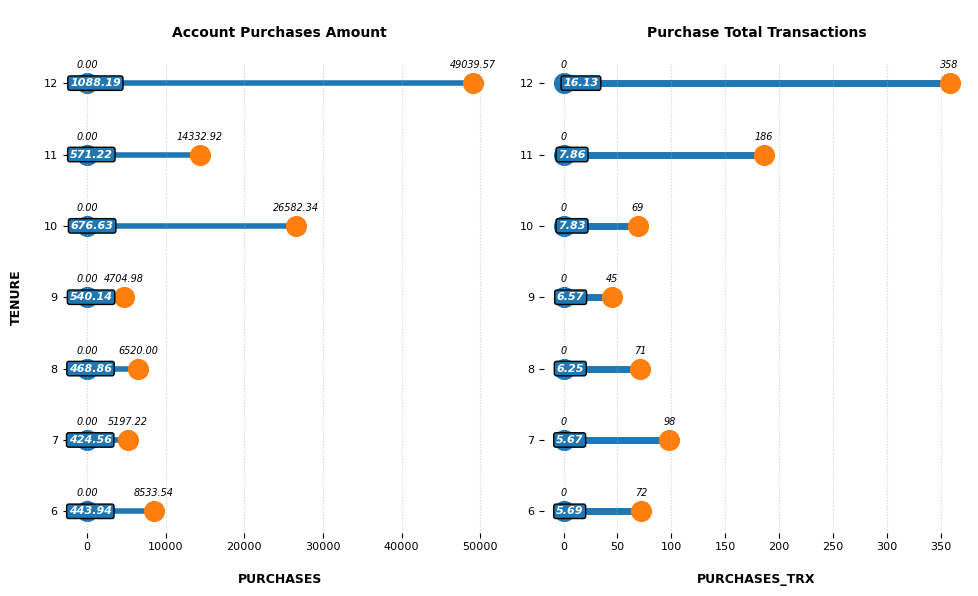

In [10]:
# --- EDA 2 Variables ---
title=dict(fontsize=10, weight='bold', ha='center')
grid_style = dict(alpha=0.6, linestyle='dotted', zorder=1)
sct_style = dict(s=175, linewidth=2)
xy_label = dict(fontweight='bold', fontsize=9)
ann_style = dict(xytext=(0, 0), textcoords='offset points', va='center', ha='center', style='italic')
tenure = sorted(credit_card['TENURE'].unique())

# --- EDA 2.1 Data Frame ---
eda2_1 = credit_card[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

# --- EDA 2.2 Data Frame ---
eda2_2 = credit_card[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# --- EDA 2.1 & 2.2 Settings ---
fig = plt.figure(figsize=(10, 6))

# Left Graph
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left=plt.gca()
min_sct = plt.scatter(x=eda2_1['MIN'], y=eda2_1['TENURE'], **sct_style)
max_sct = plt.scatter(x=eda2_1['MAX'], y=eda2_1['TENURE'], **sct_style)
for i in range(len(tenure)):
    eda2_1_x = eda2_1[eda2_1['TENURE']==tenure[i]]
    plt.hlines(y=eda2_1_x['TENURE'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MIN'].values[0]), xy=(eda2_1_x['MIN'].values[0], eda2_1_x['TENURE'].values[0]+0.25), fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['AVG'].values[0]), xy=(eda2_1_x['AVG'].values[0], eda2_1_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2), **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MAX'].values[0]), xy=(eda2_1_x['MAX'].values[0], eda2_1_x['TENURE'].values[0]+0.25), fontsize=7, **ann_style)
for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nAccount Purchases Amount\n', **title)

# Right Graph
plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right=plt.gca()
min_sctt = plt.scatter(x=eda2_2['MIN'], y=eda2_2['TENURE'], **sct_style)
max_sctt = plt.scatter(x=eda2_2['MAX'], y=eda2_2['TENURE'], **sct_style)
for i in range(len(tenure)):
    eda2_2_x = eda2_2[eda2_2['TENURE']==tenure[i]]
    plt.hlines(y=eda2_2_x['TENURE'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5, zorder=0)
    plt.annotate('{:.0f}'.format(eda2_2_x['MIN'].values[0]), xy=(eda2_2_x['MIN'].values[0], eda2_2_x['TENURE'].values[0]+0.25), fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_2_x['AVG'].values[0]), xy=(eda2_2_x['AVG'].values[0], eda2_2_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2), **ann_style)
    plt.annotate('{:.0f}'.format(eda2_2_x['MAX'].values[0]), xy=(eda2_2_x['MAX'].values[0], eda2_2_x['TENURE'].values[0]+0.25), fontsize=7, **ann_style)
for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nPurchase Total Transactions\n', **title)
plt.show();

### Credit Limit v/s Installment Purchases

C:\Users\31345\AppData\Local\Temp\ipykernel_20864\587913051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clip['TENURE'] = clip['TENURE'].astype(str)


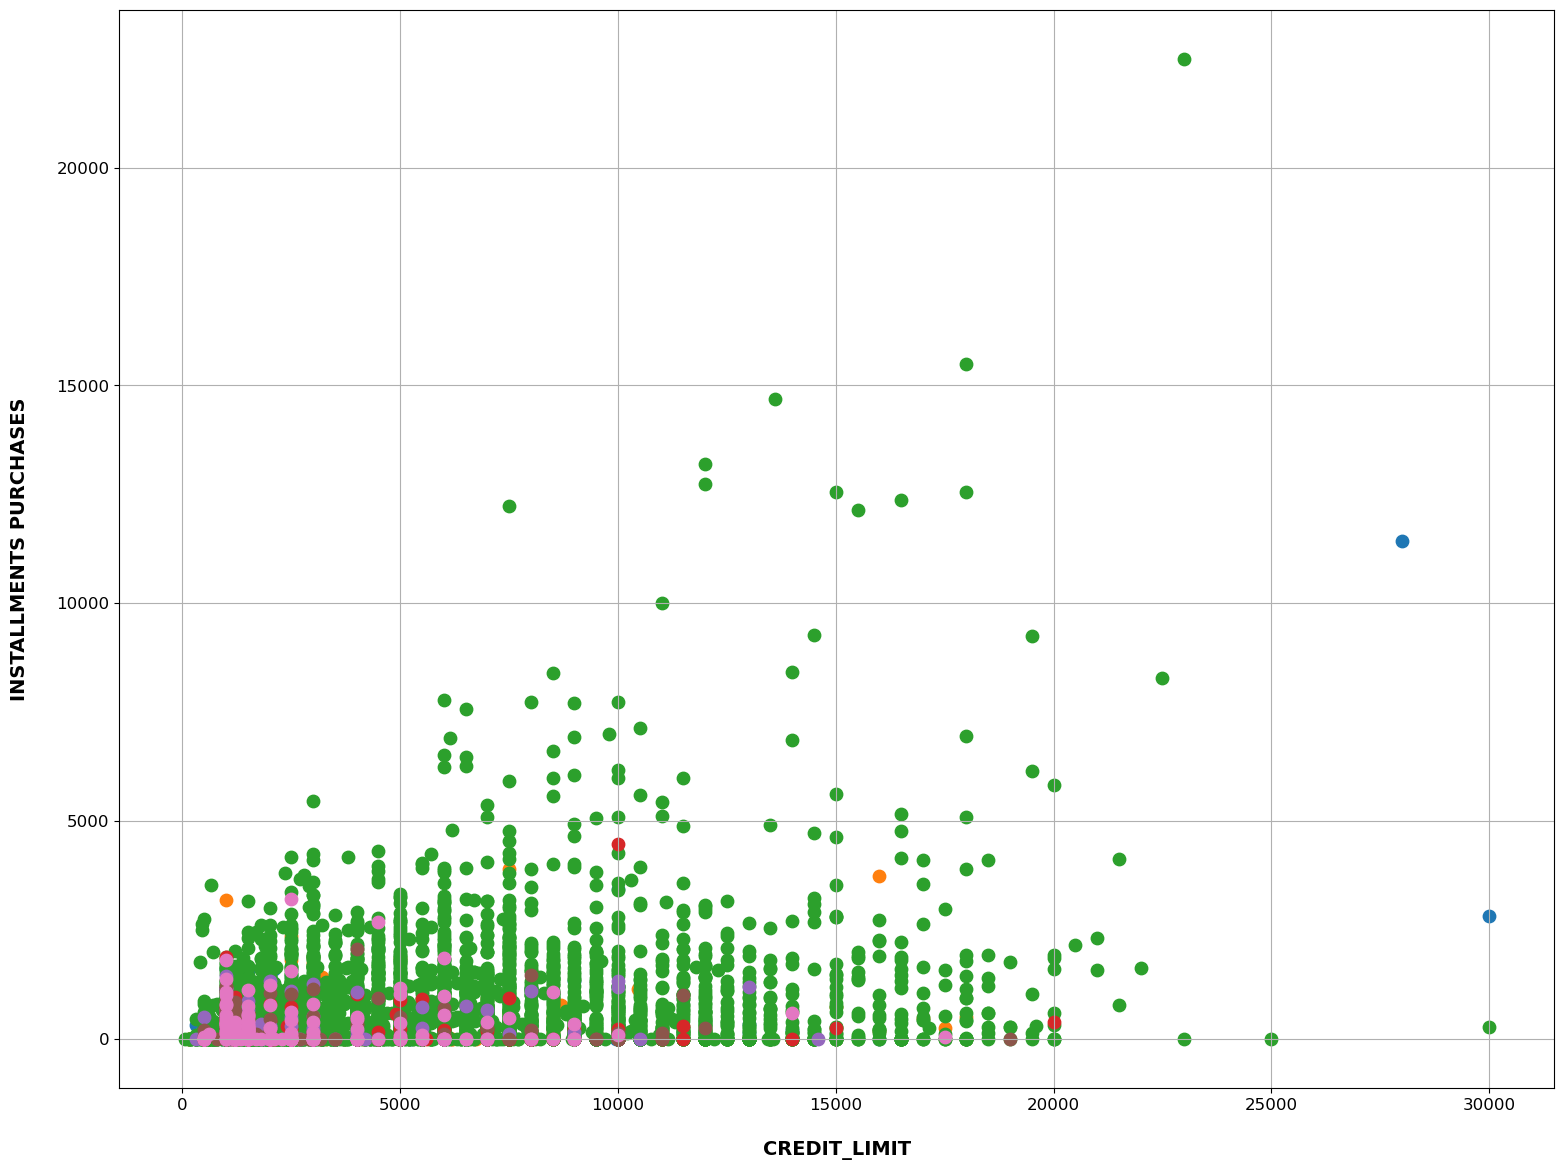

In [11]:
clip = credit_card[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']]
clip['TENURE'] = clip['TENURE'].astype(str)
tenure = sorted(clip['TENURE'].unique())

xy_label=dict(fontweight='bold', fontsize=14)

fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

for x in range(len(tenure)):
    clip_x = clip[clip['TENURE']==tenure[x]]
    ax.scatter(clip_x['CREDIT_LIMIT'], clip_x['INSTALLMENTS_PURCHASES'], s=80)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('INSTALLMENTS PURCHASES\n', **xy_label)
    ax.grid(axis='y', which='major')
    ax.grid(axis='x', which='major')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

### Data Pre-processing 

### Removing Categorical Data 

In [51]:
credit_card2 = credit_card.drop(['CUST_ID'], axis=1)
credit_card2.head().style.background_gradient(vmin=6.7, vmax=21.6).hide_index()

BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


### Imputing Data for any missing values

In [52]:
credit_card2.isnull().sum() #Checking for missing values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [53]:
from sklearn.impute import KNNImputer

null_col = credit_card2.columns[credit_card2.isnull().any()].tolist()

imputer = KNNImputer()
credit_card2_imp = pd.DataFrame(imputer.fit_transform(credit_card2[null_col]), columns=null_col)
credit_card2 = credit_card2.fillna(credit_card2_imp)

credit_card2.head().style.background_gradient(vmin=6.7, vmax=21.6).hide_index() 


BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,1215.951453,0.000000,12
817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


### Scaling the dataset 

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_card2)
print("Standardized Data = ", scaled_data)

Standardized Data =  [[-0.73198937 -0.24943448 -0.42489974 ... -0.31172902 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08704715  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10320983 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33613506  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34753313  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33362544 -0.52555097
  -4.12276757]]


**Putting Standardized data in a dataframe**

In [55]:
scaled_data = pd.DataFrame(scaled_data,columns= credit_card2.columns)

In [56]:
scaled_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311729,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.087047,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103210,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.148440,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266722,-0.525551,0.36068


### Measuring Clustering Tendency - Hopkin's Test

In [57]:
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors

# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(scaled_data):
    scaled_data=scaled_data.values  #convert dataframe to a numpy array
    sample_size = int(scaled_data.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(scaled_data.min(axis=0), scaled_data.max(axis=0) ,(sample_size ,scaled_data.shape[1]))
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, scaled_data.shape[0], 1), sample_size)
    scaled_sample =scaled_data[random_indices] #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(scaled_data)
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(scaled_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [61]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(scaled_data)
    l.append(H)
#print the estimate
print('Estimated value from the Hopkins Test: \n',np.mean(l))

Estimated value from the Hopkins Test: 
 0.964694566497234


### Elbow Plot

In [62]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [63]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)

C:\Users\31345\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31345\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31345\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31345\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\31345\Anaconda3\lib\site-packages\sklearn\clust

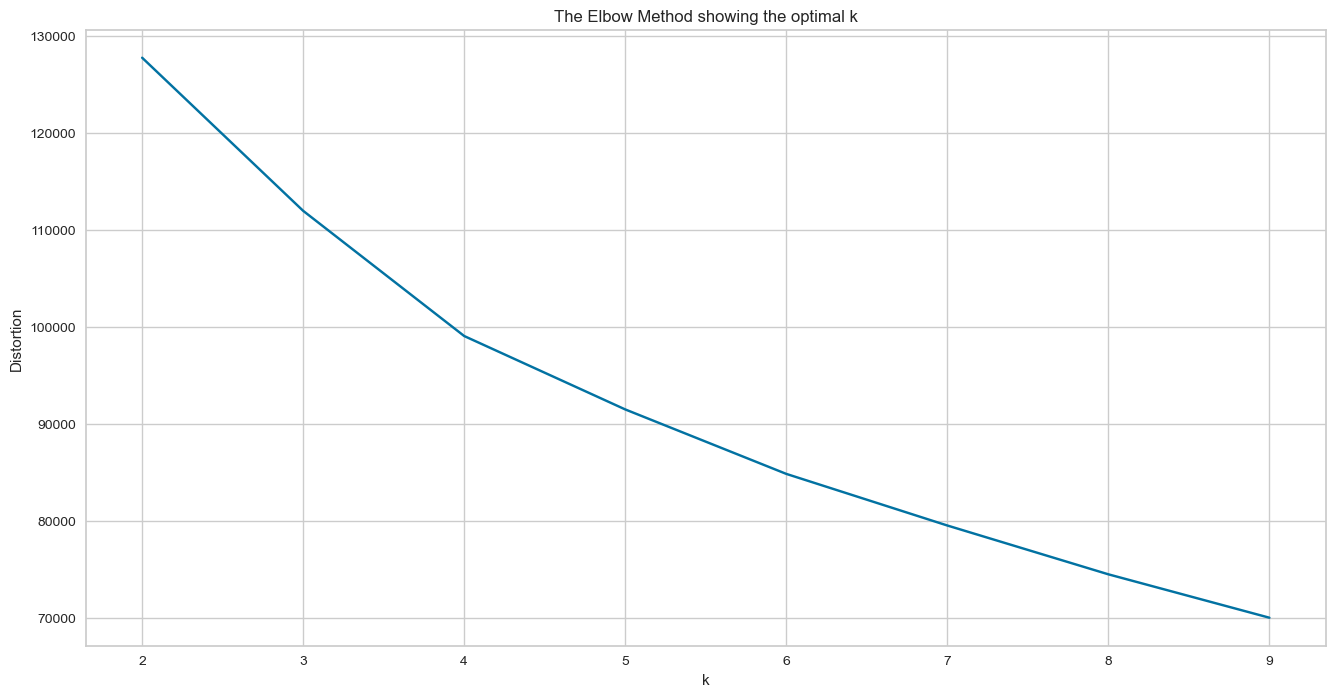

In [64]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Taking Number of Clusters = 4 

In [65]:
kmeansModel = KMeans(n_clusters=4)
kmeansModel.fit(scaled_data)
kmeansPredict= kmeansModel.predict(scaled_data)

C:\Users\31345\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
kmeansModel.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(kmeansModel.labels_)  # converting numpy array into pandas series object 
credit_card2['clust']=md # creating a  new column and assigning it to new column 
credit_card2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clust
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


## Silhouette Plot

C:\Users\31345\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


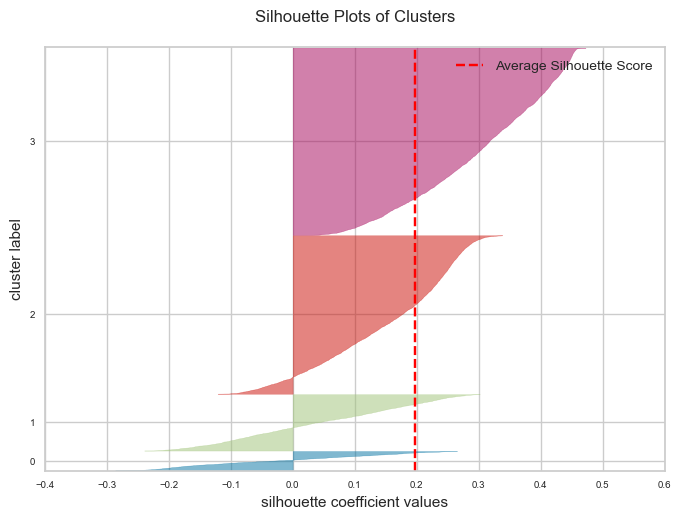

In [67]:
from yellowbrick.cluster import SilhouetteVisualizer
s_viz = SilhouetteVisualizer(kmeansModel, colors='yellowbrick')
s_viz.fit(scaled_data)
s_viz.finalize()
s_viz.ax.set_title('Silhouette Plots of Clusters\n')
s_viz.ax.tick_params(labelsize=7)

In [68]:
print('Count in each cluster: \n', credit_card2['clust'].value_counts())

Count in each cluster: 
 3    3976
2    3367
1    1198
0     409
Name: clust, dtype: int64


## Evaluating Clustering Quality

**Davies-Bouldin Index**

In [69]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_data, kmeansModel.labels_)
print('Davies-Bouldin Index:',db_index)

Davies-Bouldin Index: 1.5756611165323287


**Silhouette Score**

In [70]:
from sklearn.metrics import silhouette_score
ss_score = silhouette_score(scaled_data, kmeansModel.labels_)
print('Silhouette Score:',ss_score)

Silhouette Score: 0.19749317075203252


**Calinski Harabasz Index**

In [71]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score (scaled_data, kmeansModel.labels_)
print('Calinski Harabasz Index:',ch_index)

Calinski Harabasz Index: 1597.3989595044886


## LDA

In [30]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
X = credit_card2.iloc[:, :-1]
y = credit_card2.iloc[:, -1]

In [32]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
y.head()

0    2
1    3
2    1
3    2
4    2
Name: clust, dtype: int32

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [35]:
print(lda.coef_)

[[ 2.98568080e-04  1.36016940e+00 -1.37440532e-02  1.55945078e-02
   1.61004790e-02 -3.46306750e-04 -2.38026491e+00  4.01831558e+00
   5.70123000e+00 -1.92685063e+00  5.60995367e-04  1.65713407e-01
   1.62234192e-04  1.05118537e-04  4.10826014e-05  1.62687532e+00
  -2.56557186e-01]
 [-2.26872572e-04  2.17238157e+00  3.73122376e-03 -3.76286401e-03
  -3.76222462e-03 -1.12256236e-04  8.35074523e+00 -1.23308978e-01
   1.42781581e+00 -2.16690191e+00 -3.36539870e-02 -1.06767314e-02
   6.99532002e-06  1.48363693e-05 -3.00812991e-06  9.77675145e-01
   5.51133076e-03]
 [-1.17253881e-04 -1.47462415e+00 -4.82235455e-04  3.61725264e-04
   3.87775832e-04 -1.14095954e-04 -6.56771982e+00  9.58077324e-02
  -1.24772277e+00 -1.60322517e+00 -8.16270123e-03 -3.27304457e-03
  -8.08648016e-05  4.73231565e-06 -2.59496440e-05 -1.39269199e+00
  -5.09239305e-03]
 [ 9.24847278e-04 -1.67580336e+00 -4.19394365e-03  4.05107661e-03
   3.79008154e-03  8.12397097e-04 -8.59913882e-01 -1.34327319e+00
  -1.81829146e+00  

In [36]:
predictions = lda.predict(X)
print(predictions)

[2 3 1 ... 1 2 2]


In [37]:
accuracy = np.mean(predictions == y)
print("Accuracy: ", accuracy)

Accuracy:  0.9427932960893854


## Analysis of Customer Segments based on the clusters generated 

**Seperating Clusters**

In [38]:
creditcard_0 = credit_card2[(credit_card2 ['clust'] == 0)]
creditcard_1 = credit_card2[(credit_card2 ['clust'] == 1)]
creditcard_2 = credit_card2[(credit_card2 ['clust'] == 2)]
creditcard_3 = credit_card2[(credit_card2 ['clust'] == 3)]

In [39]:
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = credit_card2.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
df_cluster_summary =credit_card2.groupby('clust').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='Blues').hide_index()

Column Name,Metrics,0,1,2,3,Overall
BALANCE,mean,3551.153761,894.907458,1011.751528,4602.462714,1564.474828
BALANCE_FREQUENCY,mean,0.986879,0.934734,0.789871,0.968415,0.877271
PURCHASES,mean,7681.620098,1236.178934,269.973466,501.896219,1003.204834
ONEOFF_PURCHASES,mean,5095.878826,593.974874,209.853863,320.373681,592.437371
INSTALLMENTS_PURCHASES,mean,2587.208264,642.478274,60.386625,181.607404,411.067645
CASH_ADVANCE,mean,653.638891,210.570626,595.759339,4520.724309,978.871112
PURCHASES_FREQUENCY,mean,0.946418,0.885165,0.170146,0.287731,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.739031,0.297070,0.086281,0.138934,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.788060,0.711842,0.080578,0.185516,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.071290,0.042573,0.114833,0.484526,0.135144


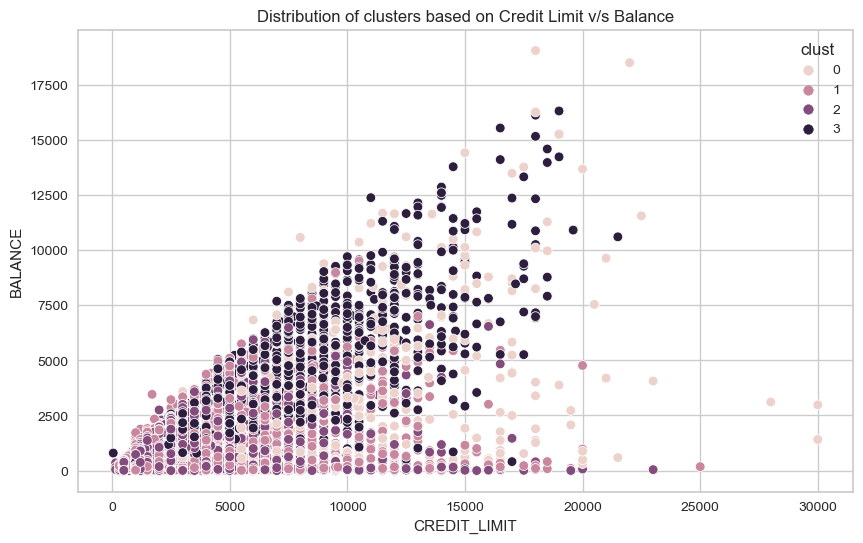

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_card2, x='CREDIT_LIMIT', y='BALANCE', hue='clust')
plt.title('Distribution of clusters based on Credit Limit v/s Balance')
plt.show()

###  One Off Purchases v/s total purchases

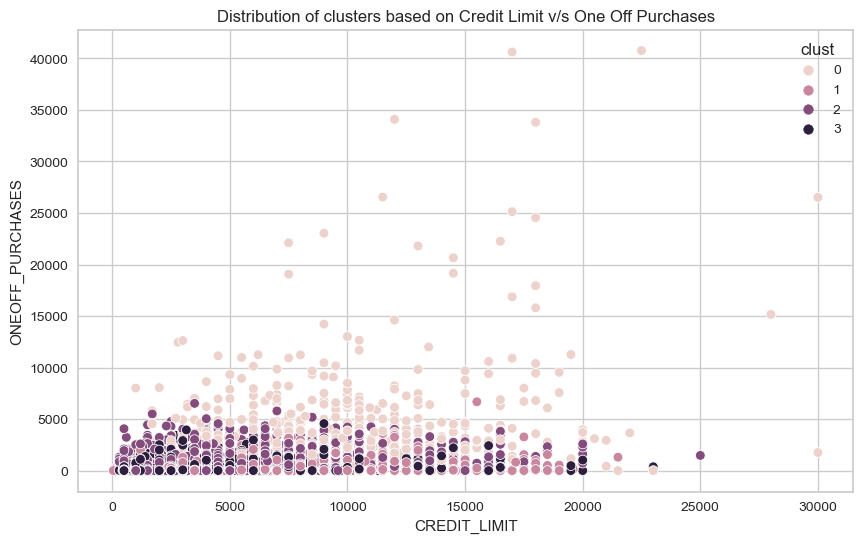

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_card2, x='CREDIT_LIMIT', y='ONEOFF_PURCHASES',hue='clust')
plt.title('Distribution of clusters based on Credit Limit v/s One Off Purchases')
plt.show()

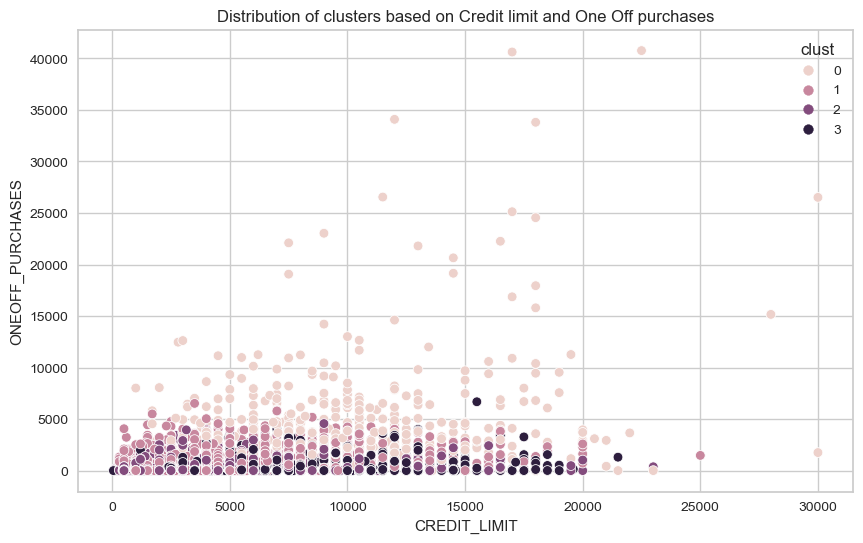

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_card2, x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='clust')
plt.title('Distribution of clusters based on Credit limit and One Off purchases')
plt.show()

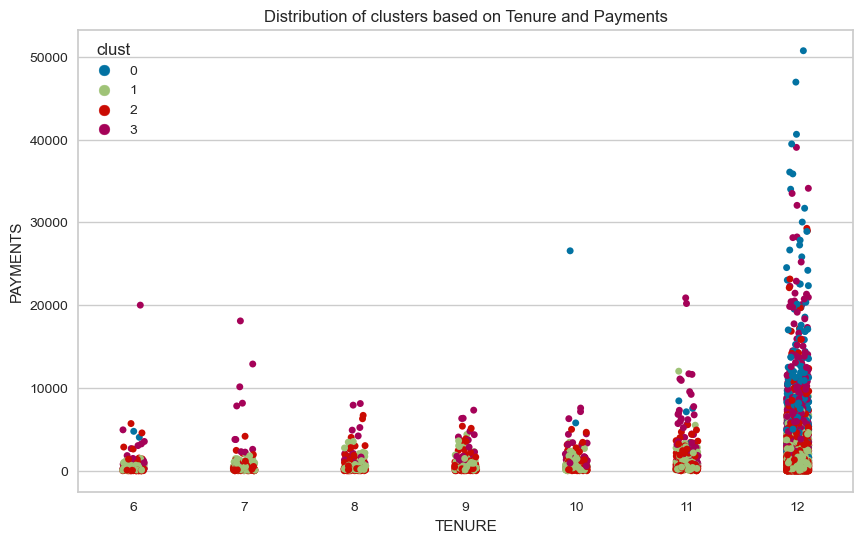

In [43]:
plt.figure(figsize=(10,6))
sns.stripplot(data=credit_card2, x='TENURE', y='PAYMENTS', hue='clust')
plt.title('Distribution of clusters based on Tenure and Payments')
plt.show()

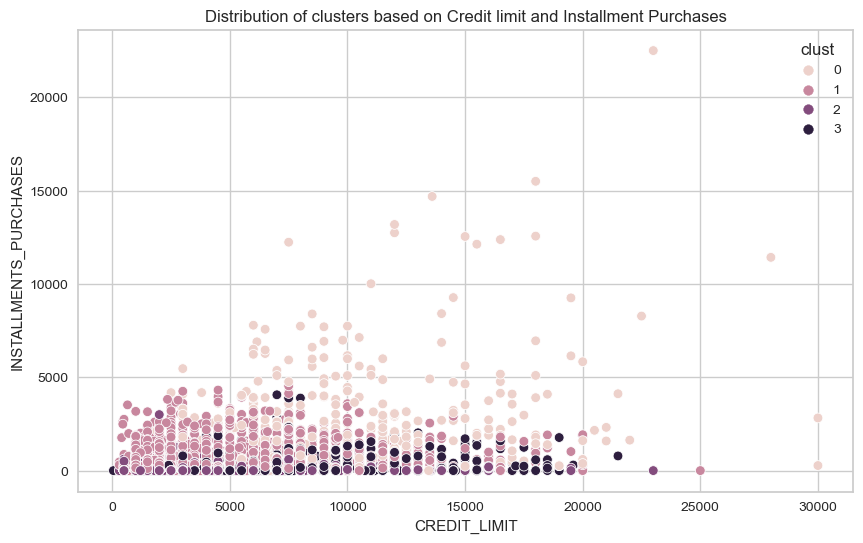

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_card2, x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES', hue='clust')
plt.title('Distribution of clusters based on Credit limit and Installment Purchases')
plt.show()